In [2]:
import glob
from PIL import Image
import fitz ## pip install pymupdf
## https://pymupdf.readthedocs.io/en/latest/pixmap.html
import pandas as pd

### decode pdf files

In [3]:
doc_list = glob.glob("ref_documents/*")
doc_list

['ref_documents/Iron Making Text Book 2008.pdf',
 'ref_documents/Principles of Blast Furnace Ironmaking.Biswas.1981.pdf',
 'ref_documents/Beyond the blast furnace 1992.pdf',
 'ref_documents/The Iron Blast Furnace - Theory and Practice 1979.pdf']

### get the colpali results file

In [4]:
folder_list = glob.glob("**/", root_dir="search_results/")
folder_list

['250123_simulation_test/', 'resized/', '250113_query_list/']

In [5]:
file_name = folder_list[0][:-1] ###############3 change the folderlist idx
result_file = f'search_results/{file_name}/{file_name}_results.txt'
result_file

'search_results/250123_simulation_test/250123_simulation_test_results.txt'

In [6]:
## bring the colpali result
data = pd.read_csv(result_file, sep='\t')
data.head()

,query_no,query,doc_id,doc_name,search_rank,searched_page,score
0,0,"When molten iron temperature is 1400℃, what sh...",1,ref_documents/Principles of Blast Furnace Iron...,0,455,21.375
1,0,"When molten iron temperature is 1400℃, what sh...",1,ref_documents/Principles of Blast Furnace Iron...,1,374,21.125
2,0,"When molten iron temperature is 1400℃, what sh...",2,ref_documents/Beyond the blast furnace 1992.pdf,2,221,21.125
3,1,"When molten iron temperature is 1500℃, how muc...",2,ref_documents/Beyond the blast furnace 1992.pdf,0,156,25.375
4,1,"When molten iron temperature is 1500℃, how muc...",1,ref_documents/Principles of Blast Furnace Iron...,1,67,25.250


In [7]:
## saving resized images for each colpali result
for idx in range(len(data)):
    img_save_name = f'search_results/{file_name}/'
    query_no, doc, rank, page = data['query_no'][idx], data['doc_id'][idx], data['search_rank'][idx], int(data['searched_page'][idx])

    resize_file_name = f'{file_name}_{query_no}_{rank}_{page}'

    # open matching document
    file_handle = fitz.open(doc_list[doc])
    searched_pg = file_handle[page].get_pixmap()
    
    # if the pdf image is too big, resize
    if max(searched_pg.width, searched_pg.height) >= 800:
        resize = max(searched_pg.width, searched_pg.height) / 800
        mat = fitz.Matrix(resize, resize)
        resized_pg = file_handle[page].get_pixmap(matrix=mat)
        # save the resized img
        resized_pg.save(img_save_name + resize_file_name + ".jpg")

    else:
        searched_pg.save(img_save_name + resize_file_name + ".jpg")


    print(f'Resized === {resize_file_name} !! ===')

Resized === 250123_simulation_test_0_0_455 !! ===
Resized === 250123_simulation_test_0_1_374 !! ===
Resized === 250123_simulation_test_0_2_221 !! ===
Resized === 250123_simulation_test_1_0_156 !! ===
Resized === 250123_simulation_test_1_1_67 !! ===
Resized === 250123_simulation_test_1_2_357 !! ===
Resized === 250123_simulation_test_2_0_145 !! ===
Resized === 250123_simulation_test_2_1_434 !! ===
Resized === 250123_simulation_test_2_2_512 !! ===
Resized === 250123_simulation_test_3_0_461 !! ===
Resized === 250123_simulation_test_3_1_463 !! ===
Resized === 250123_simulation_test_3_2_485 !! ===
Resized === 250123_simulation_test_4_0_157 !! ===
Resized === 250123_simulation_test_4_1_193 !! ===
Resized === 250123_simulation_test_4_2_363 !! ===
Resized === 250123_simulation_test_5_0_190 !! ===
Resized === 250123_simulation_test_5_1_524 !! ===
Resized === 250123_simulation_test_5_2_511 !! ===
Resized === 250123_simulation_test_6_0_147 !! ===
Resized === 250123_simulation_test_6_1_450 !! ===
R

##### check individual file

In [6]:
im = Image.open(img_list[0])

In [9]:
w, h = im.size
nw, nh = w//3, h//3

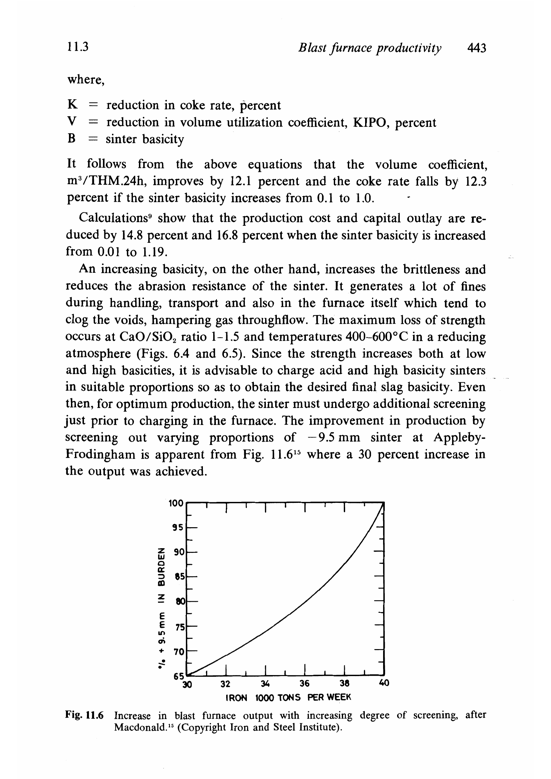

In [10]:
im.resize((nw, nh))